In [54]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
%matplotlib inline
from numpy import sin, cos

from nsmod.one_component_model_with_Euler import main
#from nsmod.manual_switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

figsize = (4.5, 3.5)
plt.style.use("thesis")

#plt.rcParams['axes.labelsize'] = 16

def nudot(time, omega0, epsI, tauAge, theta, chi, n=3):
    P = 2*np.pi/omega0
    tauP = P / epsI
    theta = np.radians(theta)
    chi = np.radians(chi)
    psi = 2*np.pi*time/tauP + np.pi/2
    a = 1./(P*tauAge)
    b = -1 + n * time/tauAge
    c = 2*theta*np.cos(chi)/np.sin(chi)*np.sin(psi)
    d = - 0.5 * theta**2*np.cos(2*psi)
    return a * (b + c + d)

In [55]:
# Standard values
R = 1e6
c = 3e10
I0 = 1e45

# B1828-11 Values
tauP = 1000 * 86400 # Precession period
B0 = 1e12


# Derived values
omega0 = 10
nu0 = omega0/(2*np.pi)
epsI3 = 1.0/(nu0 * tauP)
epsA = B0**2 * R**5 / (4 * I0 * c**2) 

# Simulation values
T = 3000 * 86400
n = 500000
error = 1e-15

# Manual changes
new_epsI3 = epsI3 * 1e3
new_epsA = epsA * 1e4
new_omega0 = 10000
new_tauP = 2 * np.pi/(new_epsI3 * new_omega0)
new_T = 5.2 * new_tauP



P = 2*np.pi/new_omega0
tauP = new_tauP
time = np.linspace(0, new_T, 1000)

BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 1.0003999200e+14
DeltaPhi_49 : 2.9896104806e-02
DeltaPhi_49_SpindownTorque : 4.4801693144e-04
DeltaPhi_63 : 4.1062489041e-01
DeltaPhi_75 : 4.3588590592e-03
EMtorqueAmplificationfactor : 4.3149973800e+01
P : 6.2831853072e-04
T : 4.4900000000e+02
a0 : 2.0000000000e+00
beta : -1.0787619587e-02
beta30 : -9.4889177245e-03
beta75 : -5.4755685943e-03
chi0 : 5.0000000000e+01
delta_omega_dot0_EM : 9.8322387066e-03
delta_omega_dot0_FP : 1.5480668654e-04
delta_omega_dot0_FP_EM : 2.1262796310e-03
epsA : 2.7800000000e-09
epsI1 : 0.0000000000e+00
epsI3 : 7.2700000000e-06
n : 5.0000000000e+05
nu_dot0 : -5.7697945202e-03
omega0 : 1.0000000000e+04
omega_dot0 : -3.6252688155e-02
source_script : one-component-model-with-Euler
tauA : 2.2601385997e+05
tauE : 2.7584161366e+05
tauP : 8.6478887638e+01
tauS : 1.6187050360e+05
theta0 : 3.4906331271e-02
wobble_angle : 3.5628790308e-02
wobble

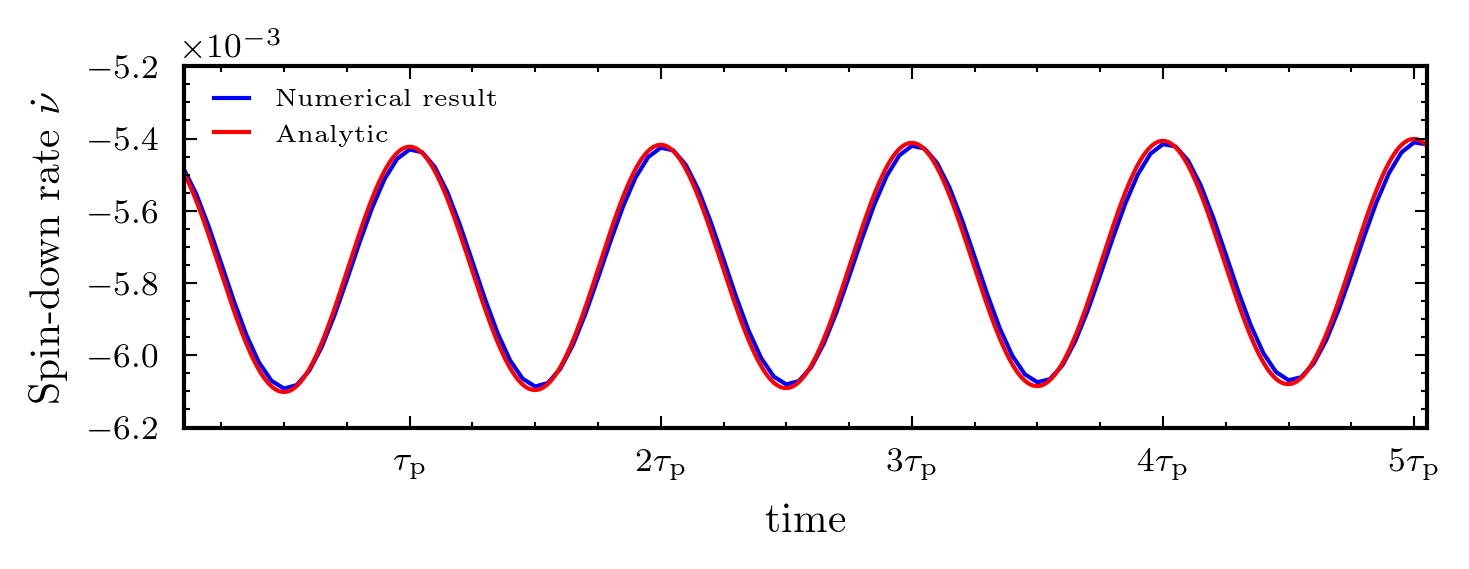

In [83]:
a0 = 2
chi0 = 50.0
file_name = main(chi0=chi0, epsI3=new_epsI3, epsA=new_epsA, omega0=new_omega0, T=new_T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False,
                 )
File_Functions.PropertiesTable(file_name, "SpindownRate_normal")
File_Functions.PrintParameterDictionary(file_name)
PD = nsmod.File_Functions.Parameter_Dictionary(file_name)
tauAge = PD['tauE']
ax = Plot.SpindownRate(file_name, label="Numerical result", figsize=(5, 2), divisor=5)
ax.plot(time, nudot(time, new_omega0, new_epsI3, tauAge, theta=a0, chi=chi0), "r", label="Analytic")
ax.legend(loc=2, frameon=False, fontsize=6)
ax.set_ylim(-6.2e-3, -5.2e-3)
plt.tight_layout()
plt.savefig("img/SpindownRate_normal.pdf")

In [57]:
File_Functions.PrintParameterDictionary(file_name)

BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 1.0003999200e+14
DeltaPhi_49 : 2.9896104806e-02
DeltaPhi_49_SpindownTorque : 4.4801693144e-04
DeltaPhi_63 : 4.1062489041e-01
DeltaPhi_75 : 4.3588590592e-03
EMtorqueAmplificationfactor : 4.3149973800e+01
P : 6.2831853072e-04
T : 4.4900000000e+02
a0 : 2.0000000000e+00
beta : -1.0787619587e-02
beta30 : -9.4889177245e-03
beta75 : -5.4755685943e-03
chi0 : 5.0000000000e+01
delta_omega_dot0_EM : 9.8322387066e-03
delta_omega_dot0_FP : 1.5480668654e-04
delta_omega_dot0_FP_EM : 2.1262796310e-03
epsA : 2.7800000000e-09
epsI1 : 0.0000000000e+00
epsI3 : 7.2700000000e-06
n : 5.0000000000e+05
nu_dot0 : -5.7697945202e-03
omega0 : 1.0000000000e+04
omega_dot0 : -3.6252688155e-02
source_script : one-component-model-with-Euler
tauA : 2.2601385997e+05
tauE : 2.7584161366e+05
tauP : 8.6478887638e+01
tauS : 1.6187050360e+05
theta0 : 3.4906331271e-02
wobble_angle : 3.5628790308e-02
wobble_angle_spindown : 5.3392578759e-04


./data/one-component-model-with-Euler_chi0_8.5000000000e+01_omega0_1.00e+04_epsI3_7.27e-06_n_500000_a0_1.0000000000e+01_T_4.49e+02_epsA_2.78e-09_epsI1_0.00e+00_AnomTorque_1.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
./data/one-component-model-with-Euler_chi0_8.5000000000e+01_omega0_1.00e+04_epsI3_7.27e-06_n_500000_a0_1.0000000000e+01_T_4.49e+02_epsA_2.78e-09_epsI1_0.00e+00_AnomTorque_1.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED


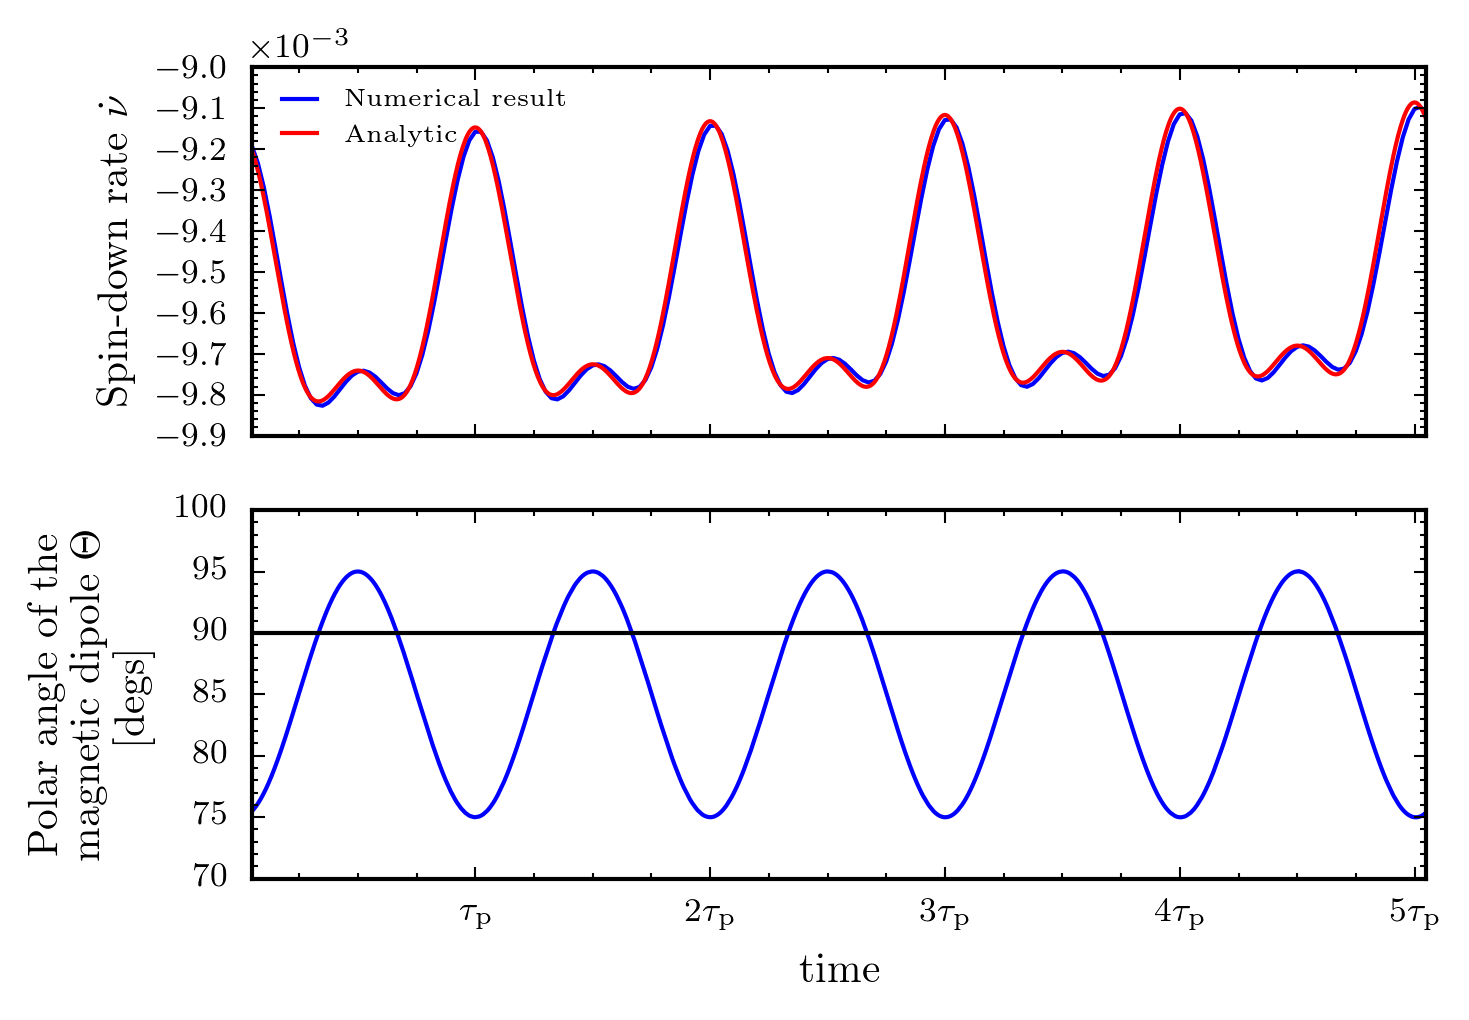

In [82]:
a0 = 10
chi0 = 85.0
file_name = main(chi0=chi0, epsI3=new_epsI3, epsA=new_epsA, omega0=new_omega0, T=new_T, 
                 n=n, error=1e-12, a0=a0, cleanup=False, DryRun=False, 
                 )

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 3.5), sharex=True)

ax1 = Plot.SpindownRate(file_name, label="Numerical result", ax=ax1)
ax1.set_xlabel("")
ax1.set_xticklabels([])
tauAge = 3*c/(2*R*new_epsA*new_omega0**2) / np.sin(np.radians(chi0))**2 / np.cos(np.radians(a0))
tauP = np.float(PD['tauP'])
ax1.plot(time, nudot(time, new_omega0, new_epsI3, tauAge, theta=a0, chi=chi0), "r", label="Analytic")
ax1.legend(loc=2, fontsize=6, frameon=False)


ax2 = Plot.big_theta(file_name, ax=ax2)
ax2.axhline(90, color="k")
#ax2.set_ylabel("$\Theta$", labelpad=10)
plt.tight_layout()
plt.savefig("img/SpindownRate_orthog.pdf")
File_Functions.PropertiesTable(file_name, "SpindownRate_orthog")

In [84]:
File_Functions.PrintParameterDictionary(file_name)

BETA FUNCTION IS USED
BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 1.0003999200e+14
DeltaPhi_49 : 2.9896104806e-02
DeltaPhi_49_SpindownTorque : 4.4801693144e-04
DeltaPhi_63 : 4.1062489041e-01
DeltaPhi_75 : 4.3588590592e-03
EMtorqueAmplificationfactor : 4.3149973800e+01
P : 6.2831853072e-04
T : 4.4900000000e+02
a0 : 2.0000000000e+00
beta : -1.0787619587e-02
beta30 : -9.4889177245e-03
beta75 : -5.4755685943e-03
chi0 : 5.0000000000e+01
delta_omega_dot0_EM : 9.8322387066e-03
delta_omega_dot0_FP : 1.5480668654e-04
delta_omega_dot0_FP_EM : 2.1262796310e-03
epsA : 2.7800000000e-09
epsI1 : 0.0000000000e+00
epsI3 : 7.2700000000e-06
n : 5.0000000000e+05
nu_dot0 : -5.7697945202e-03
omega0 : 1.0000000000e+04
omega_dot0 : -3.6252688155e-02
source_script : one-component-model-with-Euler
tauA : 2.2601385997e+05
tauE : 2.7584161366e+05
tauP : 8.6478887638e+01
tauS : 1.6187050360e+05
theta0 : 3.4906331271e-02
wobble_angle : 3.5628790308e-02
wobble_angle_spindown : 5.3392578759e-04
